In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from scipy.io import loadmat

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error

C:\Users\Sobhan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#loading datasets
X = loadmat("PaviaU.mat")["paviaU"]
y = loadmat("PaviaU_gt.mat")["paviaU_gt"]

In [3]:
#shape of the dataset
X.shape, y.shape

((610, 340, 103), (610, 340))

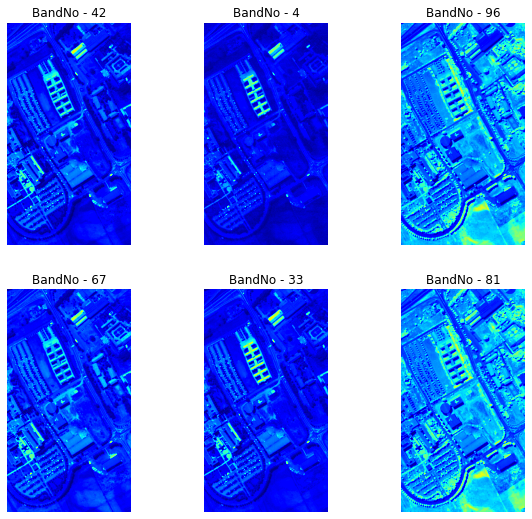

In [4]:
#plotting the bands
fig = plt.figure(figsize = (10, 9))
for i in range(1, 7):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap = "jet")
    plt.axis("off")
    plt.title(f"BandNo - {q}")

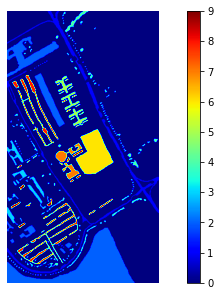

In [5]:
#visualizing of groundtruth
def plot_data(X):
    
    fig = plt.figure(figsize = (10, 5))
    plt.imshow(X, cmap = "jet")
    plt.colorbar()
    plt.axis("off")
    plt.show()

plot_data(y)

In [6]:
#extracting the pixels
def extract_pixels(X,y):
    
    data = X.reshape(-1, X.shape[2])
    pavia = pd.DataFrame(data = data)
    pavia = pd.concat([pavia, pd.DataFrame(data = y.ravel())], axis = 1)
    pavia.columns= [f"band{i}" for i in range(1, 1+X.shape[2])] + ["class"]
    pavia.to_csv("pavia.csv")
    return pavia

pavia = extract_pixels(X, y)  

In [7]:
pavia.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band95,band96,band97,band98,band99,band100,band101,band102,band103,class
0,647,499,464,371,291,319,365,322,296,305,...,3416,3335,3256,3226,3205,3210,3221,3238,3250,0
1,604,546,527,455,378,377,336,314,324,329,...,2583,2538,2509,2511,2501,2468,2442,2464,2528,0
2,621,746,556,360,285,300,274,276,332,319,...,2288,2242,2193,2202,2225,2266,2308,2345,2361,0
3,637,592,482,556,508,284,178,198,193,224,...,2675,2609,2541,2551,2571,2569,2573,2620,2644,0
4,625,560,480,360,377,341,264,208,231,266,...,2392,2344,2289,2328,2415,2424,2386,2431,2456,0


In [8]:
#Principal Component Analysis(PCA)

pca = PCA(n_components = 70)

In [9]:
principalComponents = pca.fit_transform(pavia)
ev = pca.explained_variance_ratio_

In [10]:
ev

array([5.83180602e-01, 3.61006927e-01, 4.43756078e-02, 3.00841279e-03,
       2.09792246e-03, 1.77742993e-03, 1.23120974e-03, 6.81949945e-04,
       4.63220133e-04, 3.23406530e-04, 2.45745885e-04, 1.89900695e-04,
       1.45909287e-04, 1.25512483e-04, 9.82157878e-05, 8.63674009e-05,
       7.59131355e-05, 7.33744553e-05, 6.14181541e-05, 5.64319585e-05,
       4.87394492e-05, 4.59359938e-05, 4.26035045e-05, 3.79651391e-05,
       3.58279474e-05, 2.95506808e-05, 2.77158423e-05, 2.65784711e-05,
       2.30335700e-05, 2.13641451e-05, 2.08710507e-05, 1.93700394e-05,
       1.85113494e-05, 1.70945695e-05, 1.60710897e-05, 1.59067225e-05,
       1.49401081e-05, 1.45187404e-05, 1.38574339e-05, 1.25360384e-05,
       1.17623715e-05, 1.11277365e-05, 1.06256120e-05, 1.04029336e-05,
       9.48225691e-06, 9.10444249e-06, 8.64996510e-06, 8.27160647e-06,
       7.84145471e-06, 7.14641642e-06, 7.04745426e-06, 6.45857943e-06,
       5.96127564e-06, 5.33608737e-06, 5.16413438e-06, 4.79473642e-06,
      

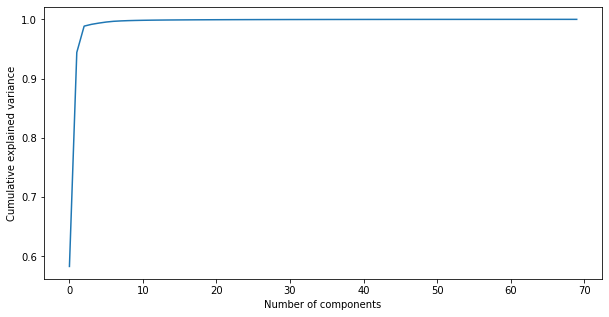

In [11]:
plt.figure(figsize = (10, 5))
plt.plot(np.cumsum(ev))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [12]:
#select 35 components for PCA

pca = PCA(n_components = 35)
data = pca.fit_transform(pavia)
pavia_data = pd.concat([pd.DataFrame(data = data), pd.DataFrame(data = y.ravel())], axis = 1)
pavia_data.columns = [f"PC-{i}" for i in range(1,36)] + ["class"]

In [13]:
pavia_data.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-27,PC-28,PC-29,PC-30,PC-31,PC-32,PC-33,PC-34,PC-35,class
0,-5150.190065,6795.052773,1532.351413,410.030443,-259.856318,-832.898941,293.239745,278.385215,-285.610033,251.208932,...,36.984486,-13.953150,-3.284707,-38.518375,41.105860,-26.779260,-16.143319,31.065030,48.011044,0
1,-6082.245779,3158.592197,1463.194696,154.617406,-438.872022,-496.202146,362.925831,187.355435,-287.796761,180.614531,...,-33.802196,-55.584878,-23.100229,18.107391,-78.135073,29.910597,-1.248128,-38.355089,13.705642,0
2,-7214.505423,1158.875814,1400.817852,410.044303,38.052804,-560.804231,-140.004210,8.847608,-211.057171,14.139050,...,-1.266678,31.361884,-7.198169,-21.997608,29.118275,14.378074,1.919972,23.036824,-0.526219,0
3,-6566.279379,3398.894765,1126.024727,496.775290,-302.415315,-409.493848,218.391570,-2.957275,-223.380136,188.819751,...,-11.940653,17.717473,-1.782087,-12.052977,45.792145,3.522582,18.925156,16.117291,-27.591939,0
4,-6496.967988,2154.797773,1035.954529,27.247946,-194.891508,-189.044672,-71.142467,-97.987806,-126.456133,215.181943,...,16.978386,-45.865387,-12.052824,3.587076,-71.048678,-30.469444,-32.535843,-7.532481,5.285238,0


In [14]:
# saving to .csv
pavia_data.to_csv("pavia_pca.csv", index = False)

In [15]:
x = pavia_data[pavia_data["class"] != 0]

X = x.iloc[:, :-1].values

y = x.loc[:, "class"].values 

names = ["Asphalt", "Meadows", "Gravel", "Trees", "Painted metal sheets", "Bare Soil", "Bitumen", "Self-Blocking Bricks", "Shadows"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11, stratify = y)

In [17]:
X_train.shape, X_test.shape

((34220, 35), (8556, 35))

In [18]:
#Random Forest Classifier
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [19]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

In [21]:
print("Accuracy score of the training data is: ", training_data_accuracy)

Accuracy score of the training data is:  1.0


In [22]:
y_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_prediction, y_test)

In [23]:
print("Accuracy score of the test data is: ", test_data_accuracy)

Accuracy score of the test data is:  0.9192379616643291


In [24]:
#classification report
print("Classification Report", classification_report(y_test, y_prediction, target_names = names))

Classification Report                       precision    recall  f1-score   support

             Asphalt       0.89      0.96      0.93      1326
             Meadows       0.92      0.99      0.95      3730
              Gravel       0.93      0.68      0.79       420
               Trees       0.96      0.91      0.94       613
Painted metal sheets       1.00      1.00      1.00       269
           Bare Soil       0.95      0.75      0.84      1006
             Bitumen       0.99      0.64      0.78       266
Self-Blocking Bricks       0.83      0.92      0.87       737
             Shadows       1.00      0.99      0.99       189

            accuracy                           0.92      8556
           macro avg       0.94      0.87      0.90      8556
        weighted avg       0.92      0.92      0.92      8556



<AxesSubplot: xlabel='Predicted_Classes', ylabel='Actual_Classes'>

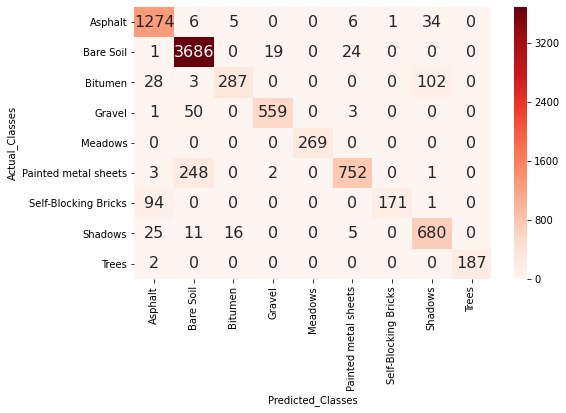

In [25]:
#confusion matrix

matrix = confusion_matrix(y_test, y_prediction)

cmatrix = pd.DataFrame(matrix, columns = np.unique(names), index = np.unique(names))

plt.figure(figsize = (8,5))
cmatrix.index.name = "Actual_Classes"
cmatrix.columns.name = "Predicted_Classes"
sns.heatmap(cmatrix, cmap = "Reds", annot = True, annot_kws = {"size": 16}, fmt = "d")

In [26]:
import math
MSE = np.square(np.subtract(y_test,y_prediction)).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: \n", RMSE)

Root Mean Square Error: 
 1.3167209615923137


In [27]:
print("Mean Absolute Error(MAE):  ", mean_absolute_error(y_test,y_prediction))

Mean Absolute Error(MAE):   14.497662459093034


In [28]:
l =[]

for i in range(pavia_data.shape[0]):
    if pavia_data.iloc[i, -1] == 0:
        l.append(0)
    else:
        l.append(model.predict(pavia_data.iloc[i, :-1].values.reshape(1, -1)))

<ipython-input-29-ded61f3dcbd4>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clmap = np.array(l).reshape(610, 340).astype("float")


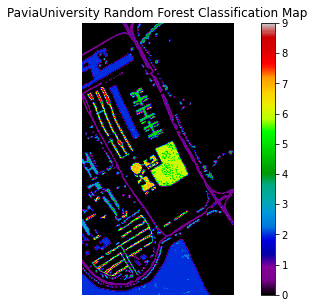

In [29]:
plt.figure(figsize = (10, 5))
clmap = np.array(l).reshape(610, 340).astype("float")
plt.imshow(clmap, cmap = "nipy_spectral")
plt.colorbar()
plt.axis("off")
plt.title("PaviaUniversity Random Forest Classification Map")
plt.savefig("svm_classification_map.png")
plt.show()